In [12]:
# Анализ динамики заражений COVID-19 в России на дату 01.05.2020
# Источник данных: Yandex.DataLens: https://datalens.yandex.ru/dashboards/rbfgkhi6y1aan?tab=5B
# Текущая визуализация данных: https://yandex.ru/covid19/stat?utm_source=main_title
# Хороший туториал по Pandas: https://pythonru.com/uroki/osnovy-pandas-3-vazhnye-metody-formatirovanija-dannyh
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [13]:
# Анализ показателя смертноси к выздоровевшим для России
def russia_analyze():
    df1 = pd.read_csv('data/table_russia_2020-05-01_12-50.csv', delimiter=';')
    # Необходимо для правильной сортировки по дате
    df1['Дата'] = pd.to_datetime(df1['Дата'], dayfirst=True)

    # Какие колонки отображаем
    columns = ['Смертей за день','Заражений за день','Выздоровлений за день']
    # Формируем датафрейм, сгруппированный по датам (по всем регионам получается), суммируем все значения в колонках,
    # которые разняться, и затем сортируем полученные данные по сгруппированной колонке
    dfAllRussia = df1.groupby(['Дата']).sum()[columns].sort_values(by=['Дата'])
    dfRes = dfAllRussia['Смертей за день']/dfAllRussia['Выздоровлений за день']
    dfRes.fillna(0, inplace=True)
    dfRes = round(dfRes*100, 1)

    # Выводим результат
    print(dfAllRussia)
    print(dfRes)

    plt.plot(dfRes)
    plt.show()

In [14]:
# Анализ показателя смертноси к выздоровевшим для определенной страны
def country_analyze(country_name='Россия', mean_window=3, show_plot=False):
    df1 = pd.read_csv('data/table_world_2020-05-01_14-12.csv', delimiter=';')
    # Необходимо для правильной сортировки по дате
    df1['Дата'] = pd.to_datetime(df1['Дата'], dayfirst=True)

    # оставляем только определенную страну
    df1 = df1[df1.Страна == country_name]
    # Какие колонки отображаем
    columns = ['Смертей за день','Заражений за день','Выздоровлений за день']
    # Формируем датафрейм, сгруппированный по датам (по всем регионам получается),
    # суммируем все значения в колонках выше,
    # и затем сортируем полученные данные по сгруппированной колонке
    df_stat = df1.groupby(['Дата']).sum()[columns].sort_values(by=['Дата'])
    df_res = df_stat['Смертей за день']/df_stat['Выздоровлений за день']
    df_res.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_res.fillna(0, inplace=True)
    print(df_res.tail(15))
    #print(round(df_res.tail()*100,1))
    # Сглаживание: считаем средние значения по последним трем дням (window)
    window = mean_window
    df_res = df_res.rolling(window).mean()
    # Считаем проценты от полученной величины и округляем
    df_res = round(df_res*100, 1)
    print(df_res.tail(15))
    df_res.fillna(0, inplace=True)

    # Выводим последние
    print(df_res.tail(5))
    df_res = round((df_res.diff()/df_res)*100,2) # Производная
    df_res = round(df_res.rolling(window).mean(),1)  # Сглаживаем производную
    df_res.fillna(0, inplace=True)
    print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
    print('!!!!!!Result (if less than zero than the level Pandemic is decreasing): ',df_res.tail(3).sum())
    print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
    df_res = df_res

    # Выводим результат
    if show_plot:
        #print(df_stat)
        plt.title(country_name)  # заголовок
        plt.xlabel("Дата")  # ось абсцисс
        plt.ylabel('Показатель спада пандемии')  # ось ординат
        plt.grid()  # включение отображение сетки
        plt.plot(df_res)
        plt.show()

    return df_res

--------------------
США
Дата
2020-04-15    0.570505
2020-04-16    0.802839
2020-04-17    0.672566
2020-04-18    0.372041
2020-04-19    0.216846
2020-04-20    0.860442
2020-04-21    0.844174
2020-04-22    1.075856
2020-04-23    0.814945
2020-04-24    0.093717
2020-04-25    1.749420
2020-04-26    0.170193
2020-04-27    0.310640
2020-04-28    0.464539
2020-04-29    0.545987
dtype: float64
Дата
2020-04-15    77.3
2020-04-16    78.2
2020-04-17    74.4
2020-04-18    66.6
2020-04-19    58.0
2020-04-20    60.5
2020-04-21    60.8
2020-04-22    61.4
2020-04-23    67.9
2020-04-24    63.2
2020-04-25    75.0
2020-04-26    68.7
2020-04-27    65.1
2020-04-28    66.0
2020-04-29    69.3
dtype: float64
Дата
2020-04-25    75.0
2020-04-26    68.7
2020-04-27    65.1
2020-04-28    66.0
2020-04-29    69.3
dtype: float64
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!Result (if less than zero than the level Pandemic is decreasing):  -0.7999999999999998
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


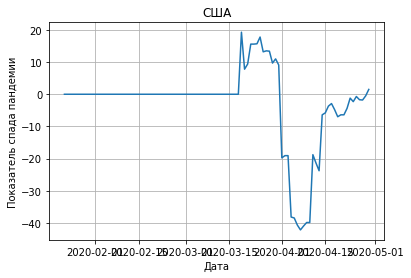

Дата
2020-01-22    0.0
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
             ... 
2020-04-25   -0.7
2020-04-26   -1.7
2020-04-27   -1.8
2020-04-28   -0.5
2020-04-29    1.5
Length: 99, dtype: float64
--------------------
Россия
Дата
2020-04-15    0.095890
2020-04-16    0.106918
2020-04-17    0.143357
2020-04-18    0.085653
2020-04-19    0.205128
2020-04-20    0.283871
2020-04-21    0.119438
2020-04-22    0.104205
2020-04-23    0.089172
2020-04-24    0.088626
2020-04-25    0.096774
2020-04-26    0.127660
2020-04-27    0.081174
2020-04-28    0.065766
2020-04-29    0.057377
dtype: float64
Дата
2020-04-15     9.6
2020-04-16    10.3
2020-04-17    10.4
2020-04-18    10.7
2020-04-19    11.7
2020-04-20    12.7
2020-04-21    13.4
2020-04-22    13.4
2020-04-23    13.3
2020-04-24    13.2
2020-04-25    13.2
2020-04-26    13.4
2020-04-27    12.8
2020-04-28    12.6
2020-04-29    11.1
dtype: float64
Дата
2020-04-25    13.2
2020-04-26    13.4
2020-04-27    12.8
2020-04-28

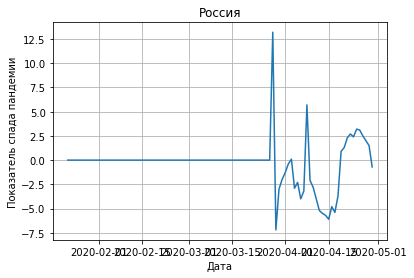

Дата
2020-01-22    0.0
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
             ... 
2020-04-25    3.1
2020-04-26    2.5
2020-04-27    2.0
2020-04-28    1.5
2020-04-29   -0.7
Length: 99, dtype: float64
--------------------
Бразилия
Дата
2020-04-15    0.018579
2020-04-16    0.000000
2020-04-17    0.000000
2020-04-18    0.000000
2020-04-19    0.013327
2020-04-20    0.000000
2020-04-21    0.178862
2020-04-22    0.070907
2020-04-23    0.338645
2020-04-24    0.344732
2020-04-25    0.234551
2020-04-26    0.230847
2020-04-27    0.320202
2020-04-28    0.342368
2020-04-29    0.270781
dtype: float64
Дата
2020-04-15    29.4
2020-04-16    29.4
2020-04-17    29.4
2020-04-18    29.4
2020-04-19     1.0
2020-04-20     1.0
2020-04-21     2.8
2020-04-22     3.5
2020-04-23     6.9
2020-04-24     9.7
2020-04-25    11.8
2020-04-26    14.1
2020-04-27    17.3
2020-04-28    20.7
2020-04-29    23.3
dtype: float64
Дата
2020-04-25    11.8
2020-04-26    14.1
2020-04-27    17.3
2020-04-

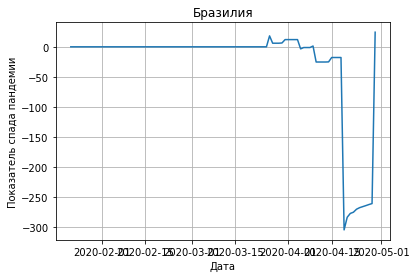

Дата
2020-01-22      0.0
2020-01-23      0.0
2020-01-24      0.0
2020-01-25      0.0
2020-01-26      0.0
              ...  
2020-04-25   -266.0
2020-04-26   -264.3
2020-04-27   -262.5
2020-04-28   -260.9
2020-04-29     24.3
Length: 99, dtype: float64
--------------------
Австралия
Дата
2020-04-15    0.000000
2020-04-16    0.000000
2020-04-17    0.002065
2020-04-18    0.003165
2020-04-19    0.000000
2020-04-20    0.000000
2020-04-21    0.000000
2020-04-22    0.000000
2020-04-23    0.069565
2020-04-24    0.044944
2020-04-25    0.004167
2020-04-26    0.018182
2020-04-27    0.000000
2020-04-28    0.077922
2020-04-29    0.040000
dtype: float64
Дата
2020-04-15    2.6
2020-04-16    2.5
2020-04-17    2.5
2020-04-18    2.5
2020-04-19    2.5
2020-04-20    2.4
2020-04-21    0.1
2020-04-22    0.1
2020-04-23    0.8
2020-04-24    1.2
2020-04-25    1.2
2020-04-26    1.4
2020-04-27    1.4
2020-04-28    2.1
2020-04-29    2.5
dtype: float64
Дата
2020-04-25    1.2
2020-04-26    1.4
2020-04-27    1.4
202

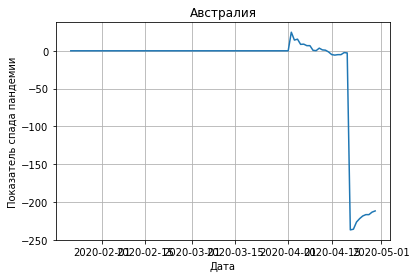

Дата
2020-01-22      0.0
2020-01-23      0.0
2020-01-24      0.0
2020-01-25      0.0
2020-01-26      0.0
              ...  
2020-04-25   -218.7
2020-04-26   -216.9
2020-04-27   -216.9
2020-04-28   -213.6
2020-04-29   -212.0
Length: 99, dtype: float64
--------------------
Швеция
Дата
2020-04-15    0.000000
2020-04-16    0.769231
2020-04-17    0.000000
2020-04-18    0.000000
2020-04-19    0.000000
2020-04-20    0.000000
2020-04-21    0.000000
2020-04-22    0.000000
2020-04-23    0.000000
2020-04-24    0.287912
2020-04-25    0.000000
2020-04-26    0.000000
2020-04-27    0.000000
2020-04-28    0.000000
2020-04-29    0.000000
dtype: float64
Дата
2020-04-15     4.4
2020-04-16    12.1
2020-04-17    12.1
2020-04-18    12.1
2020-04-19    12.1
2020-04-20     7.7
2020-04-21     7.7
2020-04-22     7.7
2020-04-23     7.7
2020-04-24    10.6
2020-04-25    10.6
2020-04-26     2.9
2020-04-27     2.9
2020-04-28     2.9
2020-04-29     2.9
dtype: float64
Дата
2020-04-25    10.6
2020-04-26     2.9
2020-04

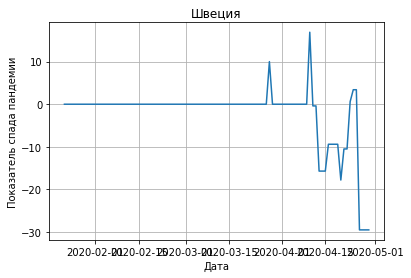

Дата
2020-01-22     0.0
2020-01-23     0.0
2020-01-24     0.0
2020-01-25     0.0
2020-01-26     0.0
              ... 
2020-04-25     3.4
2020-04-26   -29.5
2020-04-27   -29.5
2020-04-28   -29.5
2020-04-29   -29.5
Length: 99, dtype: float64
--------------------
Германия
Дата
2020-04-15    0.115909
2020-04-16    0.056364
2020-04-17    0.049068
2020-04-18    0.046807
2020-04-19    0.048846
2020-04-20    0.078857
2020-04-21    0.046216
2020-04-22    0.058571
2020-04-23    0.075897
2020-04-24    0.028462
2020-04-25    0.000000
2020-04-26    0.045000
2020-04-27    0.060000
2020-04-28    0.064828
2020-04-29    0.051000
dtype: float64
Дата
2020-04-15    4.8
2020-04-16    5.4
2020-04-17    5.6
2020-04-18    5.8
2020-04-19    5.8
2020-04-20    5.5
2020-04-21    6.1
2020-04-22    5.7
2020-04-23    6.0
2020-04-24    6.0
2020-04-25    4.9
2020-04-26    4.8
2020-04-27    4.9
2020-04-28    5.1
2020-04-29    5.1
dtype: float64
Дата
2020-04-25    4.9
2020-04-26    4.8
2020-04-27    4.9
2020-04-28    5

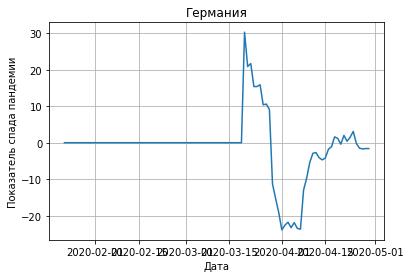

Дата
2020-01-22    0.0
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
             ... 
2020-04-25   -0.2
2020-04-26   -1.5
2020-04-27   -1.7
2020-04-28   -1.6
2020-04-29   -1.6
Length: 99, dtype: float64


In [15]:
if __name__ == '__main__':
    #countries = ['США', 'Россия', 'Италия', 'Испания', 'Индия', 'Южная Корея']
    countries = ['США', 'Россия', 'Бразилия', 'Австралия', 'Швеция', 'Германия']
    for country in countries:
        print('--------------------')
        print(country)
        print(country_analyze(country, show_plot=True, mean_window=10))

    #russia_analyze()